## Data from: https://github.com/UCSD-AI4H/COVID-CT/tree/master/Images-processed

## Pytorch 中文手册：https://github.com/TingsongYu/PyTorch_Tutorial

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import torch
import torchvision
import torch.nn as nn
import torchmetrics
from torchvision import transforms

import torchvision.models as models
from torch.utils.data import DataLoader, Dataset,random_split
from pytorch_lightning import seed_everything, LightningModule, Trainer
from sklearn.metrics import classification_report


### 1.定义数据增强方式

In [2]:
aug=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(), #ToTensor可以将PIL图像或Numpy数组转换成FloatTensor，并将图像的像素密度值压缩到[0.,1.]区间。
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), #标准化,训练时候更快的收敛 RGB三个通道
    ])#增强完已经转成np array（ToTensor()） 后面batch=next(iter(train_loader));就不报错了

### 2.借助torchvision的dataset类， 处理训练数据与标签路径

In [3]:
# dataset=torchvision.datasets.ImageFolder('../Binary/',transform=aug)
dataset = torchvision.datasets.ImageFolder('Binary',transform=aug)

torchvision.datasets.ImageFolder()  https://blog.csdn.net/qq_33254870/article/details/103362621

In [4]:
print(dataset)

Dataset ImageFolder
    Number of datapoints: 746
    Root location: Binary
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


### 3.划分数据集

In [5]:
# 理解一下思路
print('length of dataset',len(dataset)) #746 张肺片
print('length of trainset',len(dataset)*0.75)
print('length of testset',len(dataset)*0.25)
int(np.floor(len(dataset)*0.75))+int(np.ceil(len(dataset)*0.25))==len(dataset) 
# np.floor()向下取整    np.ceil()向上取整

length of dataset 746
length of trainset 559.5
length of testset 186.5


True

In [6]:
train_set, val_set =random_split(dataset,
                            [int(np.floor(len(dataset)*0.75)),int(np.ceil(len(dataset)*0.25))])
print('length of trainset',len(train_set))
print('length of testset',len(val_set))


length of trainset 559
length of testset 187


### 4.加载数据

In [7]:
# data loader expect the input as tensor not as numpy or PIL
train_loader = DataLoader(dataset,shuffle=True,num_workers=0,batch_size=8) # num_workers=0 is enough for this small dataset
batch=next(iter(train_loader));
print(batch[0].shape)  # 第0个batch，8张图像， 3通道RGB, 224*224
print(batch[1]) # 打印标签 1=covid， 0= noncovid

torch.Size([8, 3, 224, 224])
tensor([0, 0, 1, 1, 1, 1, 0, 1])


pytorch中DataLoader的num_workers参数详解与设置大小建议

https://blog.csdn.net/qq_28057379/article/details/115427052?ops_request_misc=&request_id=&biz_id=102&utm_term=dataloder%20num_workers=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-115427052.142^v70^control,201^v4^add_ask&spm=1018.2226.3001.4187

### 5.可视化查看

make_grid() 的作用是将若干幅图像拼成一幅图像。

https://blog.csdn.net/u012343179/article/details/83007296?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522167293295716800188546339%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=167293295716800188546339&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-83007296-null-null.142^v70^control,201^v4^add_ask&utm_term=torchvision.utils.make_grid&spm=1018.2226.3001.4187

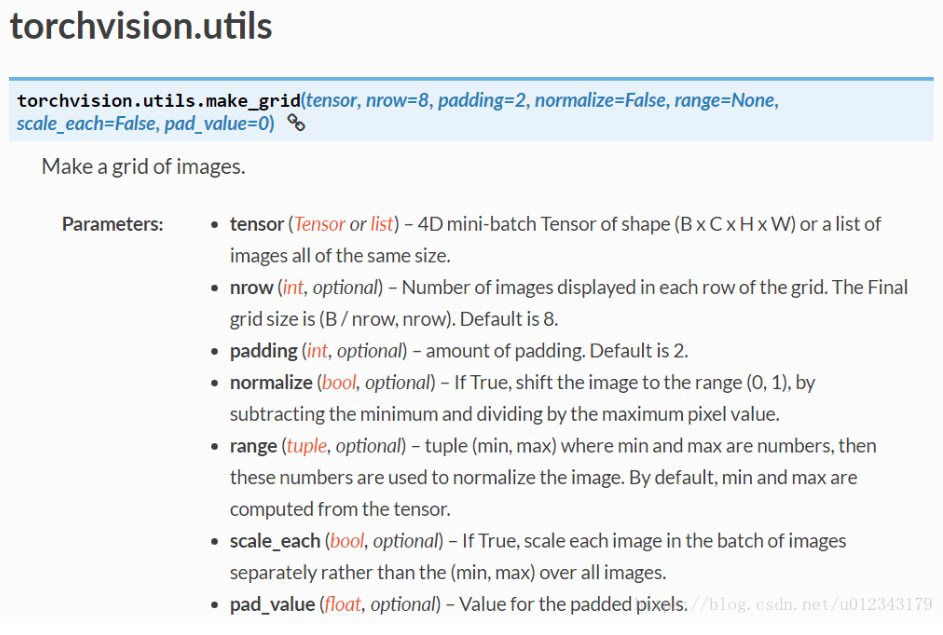

torch.Size([3, 454, 906])


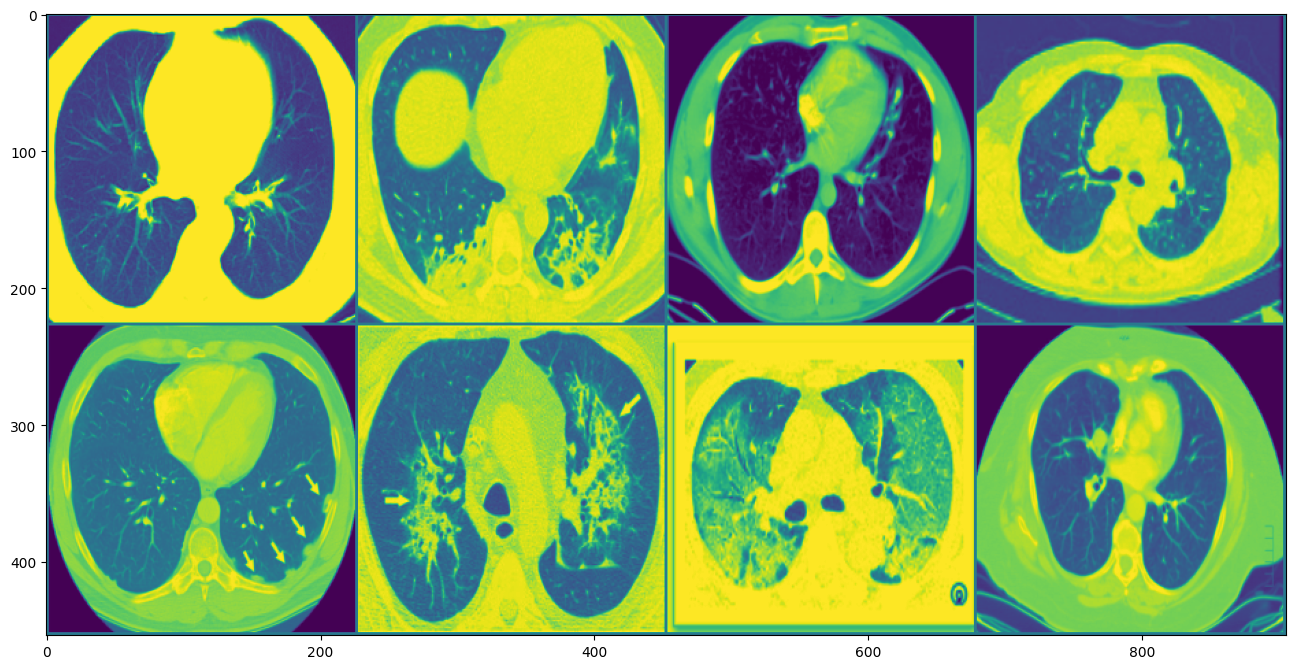

In [8]:
plt.figure(figsize=(16,16))
grid_img=torchvision.utils.make_grid(batch[0],4,2) # make_grid的作用是将若干幅图像拼成一幅图像。
print(grid_img.shape)
plt.imshow(grid_img[2])

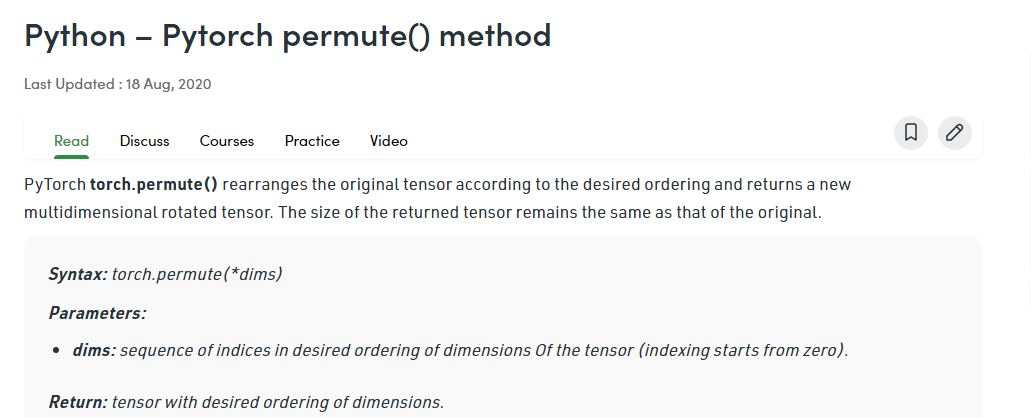

In [9]:
grid_img.permute(1, 2, 0).shape  # 置换一下通道的顺序

torch.Size([454, 906, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


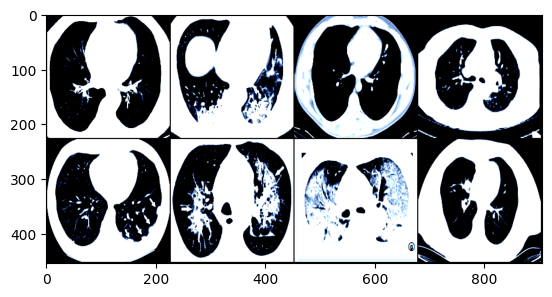

In [10]:
plt.imshow(grid_img.permute(1, 2, 0))